#**Exploratory Data Analysis (EDA)**

## **Import Library**

In [77]:
# It helps manipulate data
import pandas as pd

# It helps with calculations
import numpy as np

# It helps create visualizations
import matplotlib.pyplot as plt

# It helps optimise curve fitting
from scipy.optimize import curve_fit

# It help to carry out optimization
from scipy import optimize

# It helps assess prediction errors
from sklearn.metrics import mean_squared_error

# It helps statistical analysis, such as chi-square
from scipy import stats

# Min Max Scaler --> It helps to normalize or standardize data by transforming features within a specific range,
# typically between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

# # Mean Squared Error -->  It helps to calculate the Mean Squared Error (MSE)
# between two sets of data: the true values and the predicted values
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

## **Import Data**

In [78]:
# Change the Github link to download directly
data = "https://raw.githubusercontent.com/Dafebecca/COVID-19-BANDUNG/main/COVID-19%20BANDUNG.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(data, delimiter=";")

# Display the DataFrame
display(df)

,Tanggal,Terinfeksi,Sembuh,Meninggal,Total Kasus,S-Sembuh,S-Meninggal,Removed,Susceptible
0,02/03/2021,1351,8024,197,9572,268,3,8221,2490428
1,02/04/2021,1103,8452,202,9757,428,5,8654,2490243
2,02/05/2021,1103,8452,202,9757,0,0,8654,2490243
3,02/06/2021,1227,8591,203,10021,139,1,8794,2489979
4,02/07/2021,1293,8597,206,10096,6,3,8803,2489904
...,...,...,...,...,...,...,...,...,...
863,6/16/2023,51,104608,1489,106148,16,0,106097,2393852
864,6/17/2023,51,104608,1489,106148,0,0,106097,2393852
865,6/18/2023,41,104619,1489,106149,11,0,106108,2393851
866,6/19/2023,32,104632,1489,106153,13,0,106121,2393847


## **Data Info**

In [79]:
# Looking at the shape --> There are 869 rows and 5 columns
df.shape

(868, 9)

In [80]:
# Viewing Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tanggal      868 non-null    object
 1   Terinfeksi   868 non-null    int64 
 2   Sembuh       868 non-null    int64 
 3   Meninggal    868 non-null    int64 
 4   Total Kasus  868 non-null    int64 
 5   S-Sembuh     868 non-null    int64 
 6   S-Meninggal  868 non-null    int64 
 7   Removed      868 non-null    int64 
 8   Susceptible  868 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 61.2+ KB


In [81]:
# Data Describe
df.describe()

,Terinfeksi,Sembuh,Meninggal,Total Kasus,S-Sembuh,S-Meninggal,Removed,Susceptible
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,8.680000e+02
mean,1204.039171,64911.943548,1240.589862,67355.826037,111.615207,1.491935,66152.533410,2.432643e+06
std,2220.495782,33606.582163,446.579051,33460.612170,302.853765,7.363909,33948.751693,3.346123e+04
min,14.000000,8024.000000,197.000000,9572.000000,0.000000,0.000000,8221.000000,2.393844e+06
25%,108.000000,39961.500000,1410.000000,41971.000000,0.000000,0.000000,41371.500000,2.401548e+06
50%,482.000000,84161.500000,1475.000000,86005.500000,19.000000,0.000000,85636.500000,2.413994e+06
75%,1011.750000,95989.750000,1484.000000,98451.500000,96.000000,0.000000,97473.750000,2.458029e+06
max,12918.000000,104638.000000,1489.000000,106156.000000,3320.000000,138.000000,106127.000000,2.490428e+06


#**Modelling Data**

### **SIR Model - Runge Kutta 4th Order**

In [82]:
# Function SIR Model - Runge Kutta 4th Order

def S_RK4(t, beta, gamma, population):
  xplot=[0]

  N = population

  # Steps
  h = 1

  # Initial Infections
  I = [1]

  # Initial Susceptible
  S = [N-3]

  # Initial Recovered
  R = [0]

  for i in range(len(t)):
    x = xplot[i]
    Sn = S[i]
    In = I[i]
    Rn = R[i]

    # RK1
    k_1S = -beta * Sn * In / N
    k_1I = beta * Sn * In / N - gamma * In
    k_1R = gamma* In

    # RK2
    k_2S = -beta * (Sn + k_1S * h / 2) * (In + k_1I * h / 2) / N
    k_2I = beta * (Sn + k_1S * h / 2) * (In + k_1I * h / 2) / N - gamma * (In + k_1I * h / 2)
    k_2R = gamma * (In + k_1I * h / 2)

    # RK3
    k_3S = -beta * (Sn + k_2S * h / 2) * (In + k_2I * h / 2) / N
    k_3I = beta * (Sn + k_2S * h / 2) * (In + k_2I * h / 2) / N - gamma * (In + k_2I * h / 2)
    k_3R = gamma * (In + k_2I * h / 2)

    # RK4
    k_4S = -beta * (Sn + k_3S * h) * (In + k_3I * h) / N
    k_4I = beta * (Sn + k_3S * h) * (In + k_3I * h) / N - gamma * (In + k_3I * h)
    k_4R = gamma * (In + k_3I * h)

    # Update S, I, R using RK4 formulas
    yS = Sn + (h / 6) * (k_1S + 2 * k_2S + 2 * k_3S + k_4S)
    yI = In + (h / 6) * (k_1I + 2 * k_2I + 2 * k_3I + k_4I)
    yR = Rn + (h / 6) * (k_1R + 2 * k_2R + 2 * k_3R + k_4R)

    xplot.append(x + h)
    S.append(yS)
    I.append(yI)
    R.append(yR)

  return S[:-1]

def I_RK4(t, beta, gamma, population):
  xplot=[0]

  N = population

  # Steps
  h = 1

  # Initial Infections
  I = [1]

  # Initial Susceptible
  S = [N-3]

  # Initial Recovered
  R = [0]

  for i in range(len(t)):
    x = xplot[i]
    Sn = S[i]
    In = I[i]
    Rn = R[i]

    # RK1
    k_1S = -beta * Sn * In / N
    k_1I = beta * Sn * In / N - gamma * In
    k_1R = gamma* In

    # RK2
    k_2S = -beta * (Sn + k_1S * h / 2) * (In + k_1I * h / 2) / N
    k_2I = beta * (Sn + k_1S * h / 2) * (In + k_1I * h / 2) / N - gamma * (In + k_1I * h / 2)
    k_2R = gamma * (In + k_1I * h / 2)

    # RK3
    k_3S = -beta * (Sn + k_2S * h / 2) * (In + k_2I * h / 2) / N
    k_3I = beta * (Sn + k_2S * h / 2) * (In + k_2I * h / 2) / N - gamma * (In + k_2I * h / 2)
    k_3R = gamma * (In + k_2I * h / 2)

    # RK4
    k_4S = -beta * (Sn + k_3S * h) * (In + k_3I * h) / N
    k_4I = beta * (Sn + k_3S * h) * (In + k_3I * h) / N - gamma * (In + k_3I * h)
    k_4R = gamma * (In + k_3I * h)

    # Update S, I, R using RK4 formulas
    yS = Sn + (h / 6) * (k_1S + 2 * k_2S + 2 * k_3S + k_4S)
    yI = In + (h / 6) * (k_1I + 2 * k_2I + 2 * k_3I + k_4I)
    yR = Rn + (h / 6) * (k_1R + 2 * k_2R + 2 * k_3R + k_4R)

    xplot.append(x + h)
    S.append(yS)
    I.append(yI)
    R.append(yR)

  return I[:-1]

def R_RK4(t, beta, gamma, population):
  xplot=[0]

  N = population

  # Steps
  h = 1

  # Initial Infections
  I = [1]

  # Initial Susceptible
  S = [N-3]

  # Initial Recovered
  R = [0]

  for i in range(len(t)):
    x = xplot[i]
    Sn = S[i]
    In = I[i]
    Rn = R[i]

    # RK1
    k_1S = -beta * Sn * In / N
    k_1I = beta * Sn * In / N - gamma * In
    k_1R = gamma* In

    # RK2
    k_2S = -beta * (Sn + k_1S * h / 2) * (In + k_1I * h / 2) / N
    k_2I = beta * (Sn + k_1S * h / 2) * (In + k_1I * h / 2) / N - gamma * (In + k_1I * h / 2)
    k_2R = gamma * (In + k_1I * h / 2)

    # RK3
    k_3S = -beta * (Sn + k_2S * h / 2) * (In + k_2I * h / 2) / N
    k_3I = beta * (Sn + k_2S * h / 2) * (In + k_2I * h / 2) / N - gamma * (In + k_2I * h / 2)
    k_3R = gamma * (In + k_2I * h / 2)

    # RK4
    k_4S = -beta * (Sn + k_3S * h) * (In + k_3I * h) / N
    k_4I = beta * (Sn + k_3S * h) * (In + k_3I * h) / N - gamma * (In + k_3I * h)
    k_4R = gamma * (In + k_3I * h)

    # Update S, I, R using RK4 formulas
    yS = Sn + (h / 6) * (k_1S + 2 * k_2S + 2 * k_3S + k_4S)
    yI = In + (h / 6) * (k_1I + 2 * k_2I + 2 * k_3I + k_4I)
    yR = Rn + (h / 6) * (k_1R + 2 * k_2R + 2 * k_3R + k_4R)

    xplot.append(x + h)
    S.append(yS)
    I.append(yI)
    R.append(yR)

  return R[:-1]

#### **Infected**

In [83]:
# Format : Change the data type for the infected columns to numeric
df["Terinfeksi"] = pd.to_numeric(df["Terinfeksi"], errors="coerce")

In [84]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

In [85]:
df["Tanggal"]

,Tanggal
0,2021-02-03
1,2021-02-04
2,2021-02-05
3,2021-02-06
4,2021-02-07
...,...
863,2023-06-16
864,2023-06-17
865,2023-06-18
866,2023-06-19


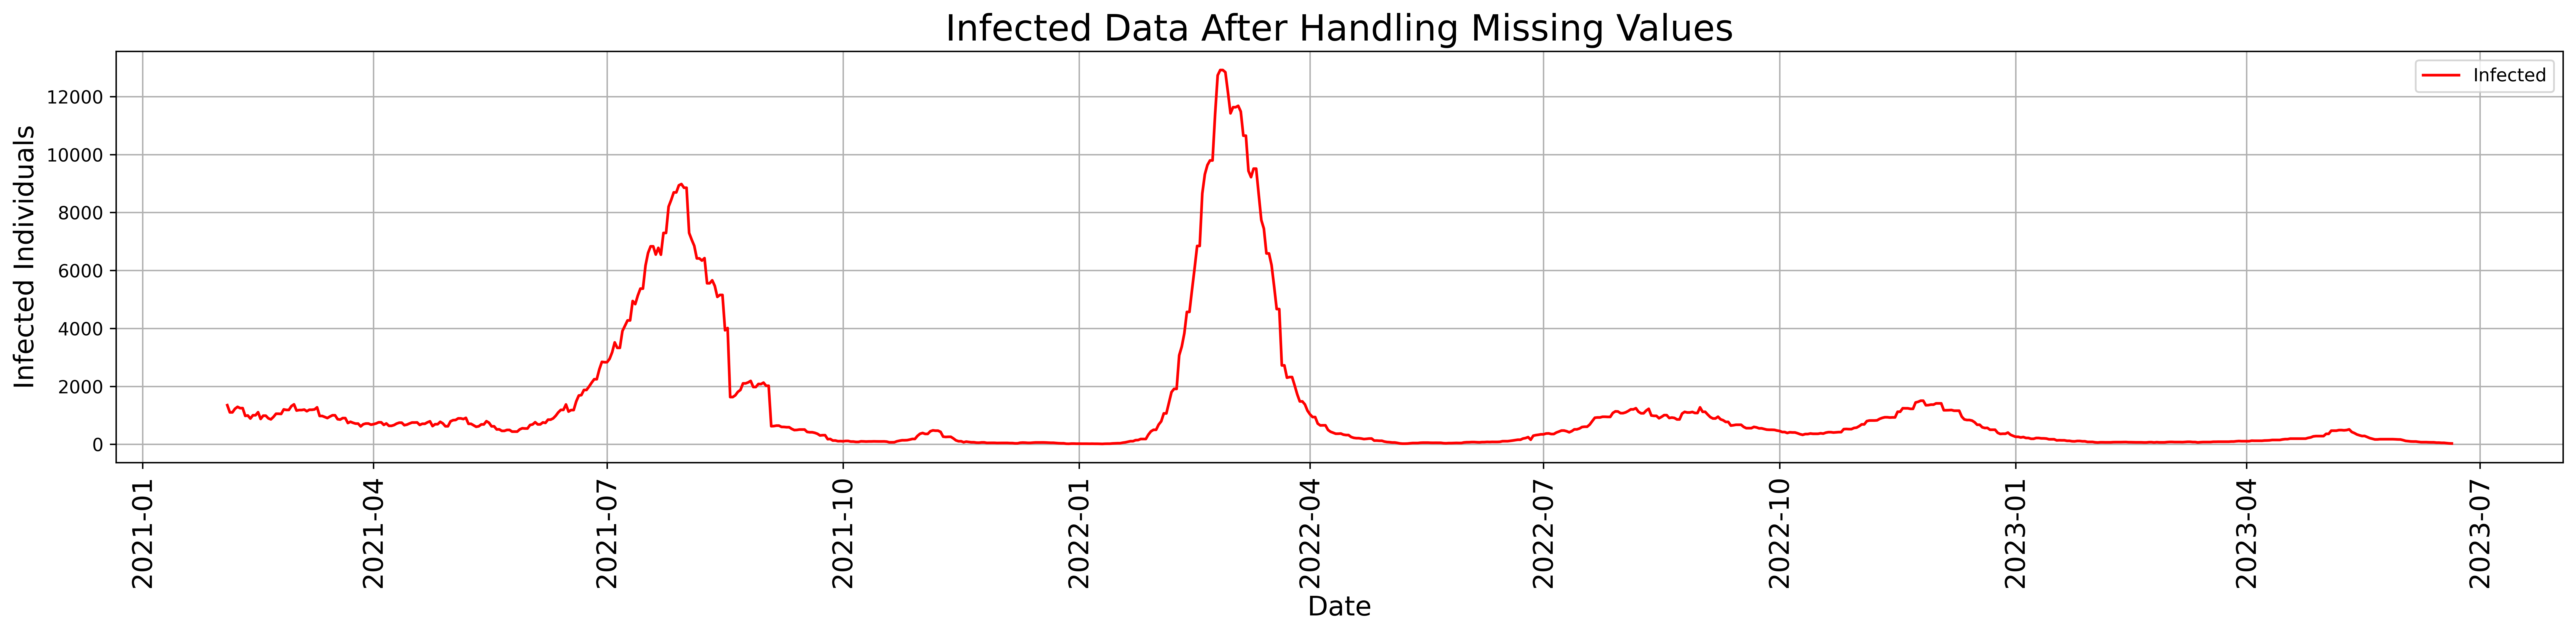

In [86]:
# Visualization
days = np.arange(0,len(df["Terinfeksi"])).tolist()
df["Day"] = days

# Create a line plot
plt.figure(figsize=(20, 5), dpi=600)
plt.plot(df["Tanggal"], df["Terinfeksi"], label="Infected", color="red")

# Adding titles and labels
plt.title("Infected Data After Handling Missing Values", fontsize = "20")
plt.xlabel("Date", fontsize = "15")
plt.ylabel("Infected Individuals", fontsize = "15")
plt.legend()

# Improve formatting
# plt.xticks(rotation=90,fontsize="6")
plt.xticks(rotation=90, fontsize="15")
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
# plt.savefig("Infected - After Handling Missing Values.png", dpi=300, bbox_inches="tight")
plt.show()

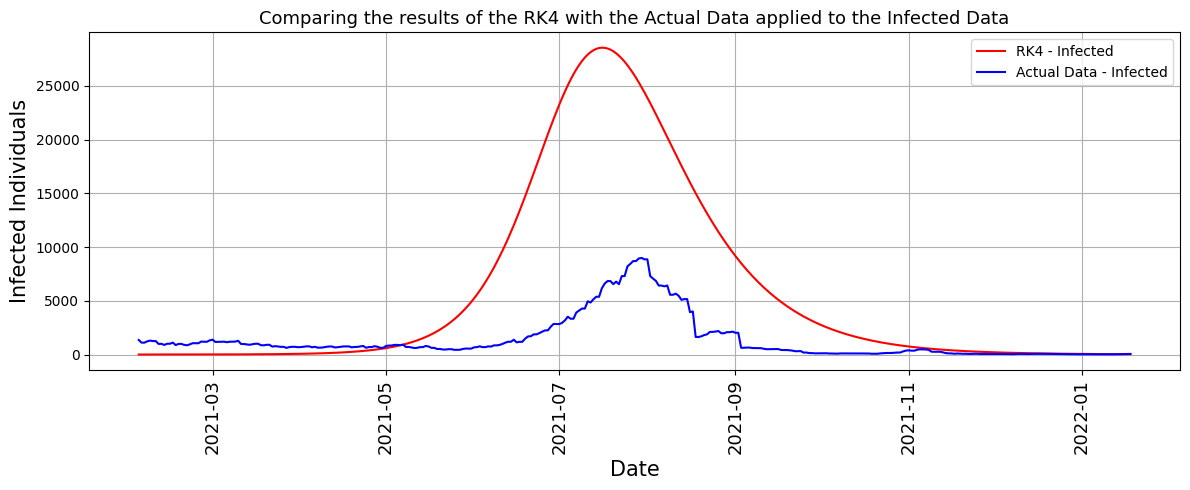

In [87]:
df_350 = df.head(350)

# Create a line plot
plt.figure(figsize=(12, 5))
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.15, 1/14, 120000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.129, 1/14, 120000), label="RK4 - Infected", color="red")

# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.15, 1/14, 150000), label="RK4 - Infected", color="red")

# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.13, 1/14, 180000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.135, 1/14, 180000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.14, 1/14, 180000), label="RK4 - Infected", color="red")
plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.145, 1/14, 180000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.147, 1/14, 180000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.15, 1/14, 180000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.155, 1/14, 180000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.157, 1/14, 180000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.16, 1/14, 180000), label="RK4 - Infected", color="red")

# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.15, 1/14, 200000), label="RK4 - Infected", color="red")

# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.128, 1/14, 220000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.135, 1/14, 220000), label="RK4 - Infected", color="red")
# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.15, 1/14, 220000), label="RK4 - Infected", color="red")

# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.14, 1/14, 240000), label="RK4 - Infected", color="red")

# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.15, 1/14, 250000), label="RK4 - Infected", color="red")

# plt.plot(df_350["Tanggal"], I_RK4(range(0,350), 0.127, 1/14, 270000), label="RK4 - Infected", color="red")

plt.plot(df_350["Tanggal"], df_350["Terinfeksi"], label="Actual Data - Infected", color="blue")

# Adding titles and labels
plt.title("Comparing the results of the RK4 with the Actual Data applied to the Infected Data", fontsize="13")
plt.xlabel("Date", fontsize="15")
plt.ylabel("Infected Individuals", fontsize="15")
plt.legend()

# Improve formatting
plt.xticks(rotation=90, fontsize="13")
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.savefig("I-145.png", dpi=600, bbox_inches="tight")
plt.show()

#### **Recovered**

In [88]:
# Format : Change the data type for the removed columns to numeric
df["Removed"] = pd.to_numeric(df["Removed"], errors="coerce")

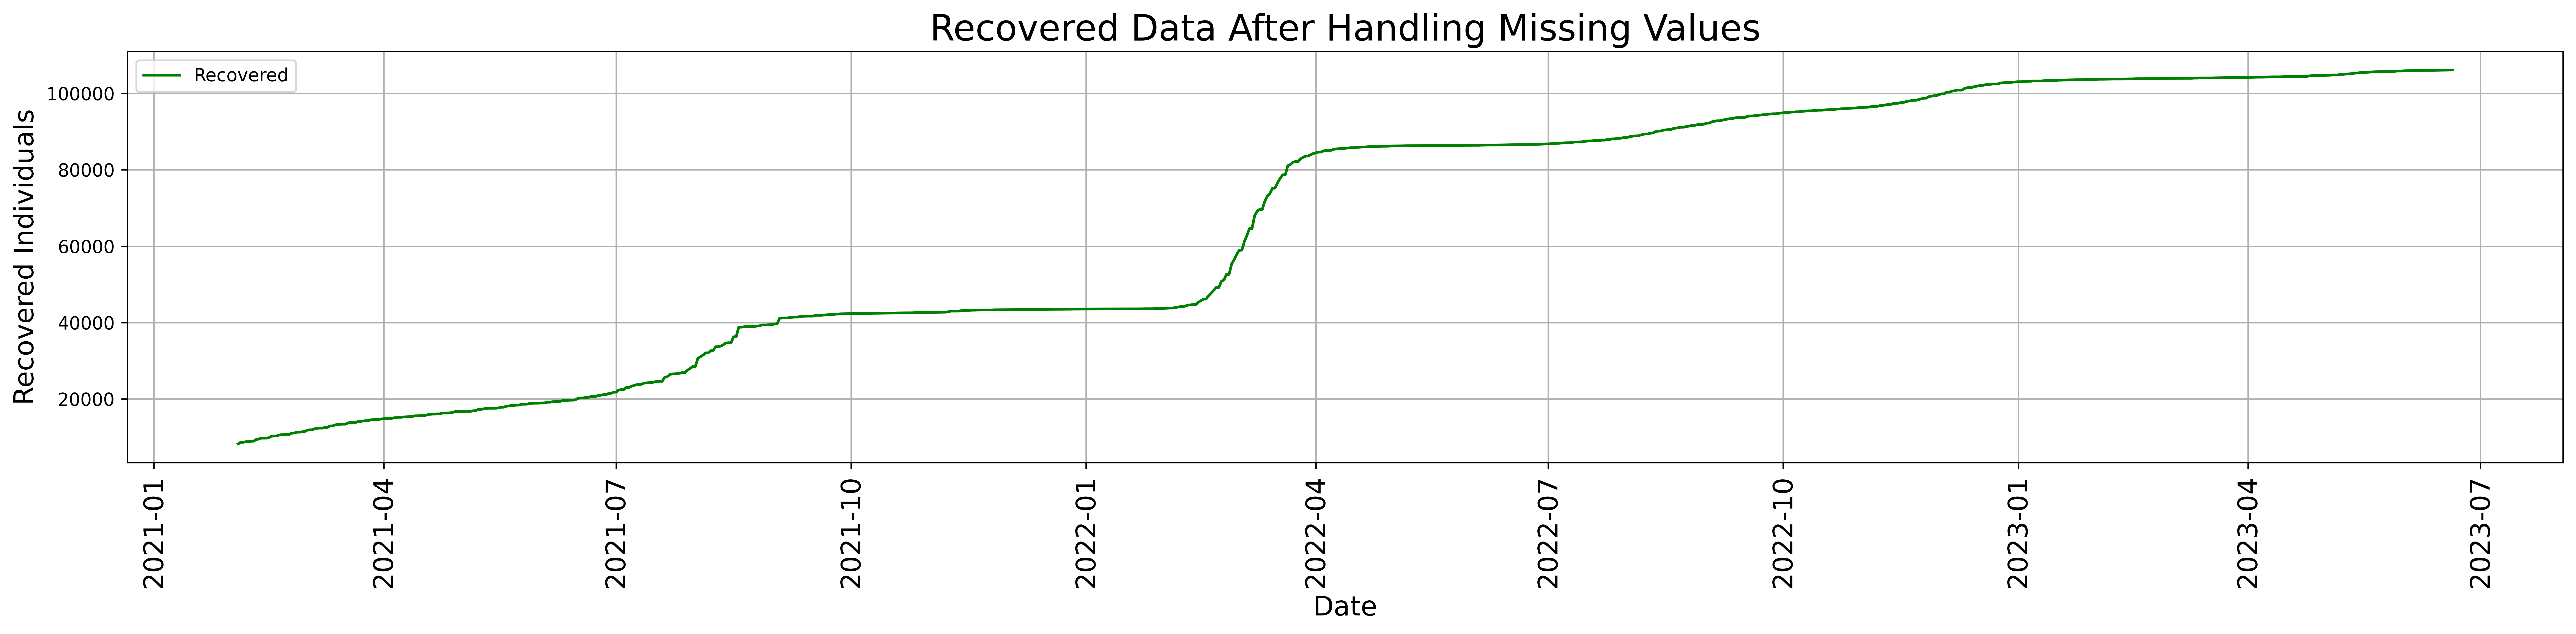

In [89]:
# Visualization
days = np.arange(0,len(df["Removed"])).tolist()
df["Day"] = days

# Create a line plot
plt.figure(figsize=(20, 5), dpi=600)
plt.plot(df["Tanggal"], df["Removed"], label="Recovered", color="green")

# Adding titles and labels
plt.title("Recovered Data After Handling Missing Values", fontsize = "20")
plt.xlabel("Date", fontsize = "15")
plt.ylabel("Recovered Individuals", fontsize = "15")
plt.legend()

# Improve formatting
# plt.xticks(rotation=90,fontsize="6")
plt.xticks(rotation=90, fontsize="15")
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
# plt.savefig("Recovered - After Handling Missing Values.png", dpi=300, bbox_inches="tight")
plt.show()

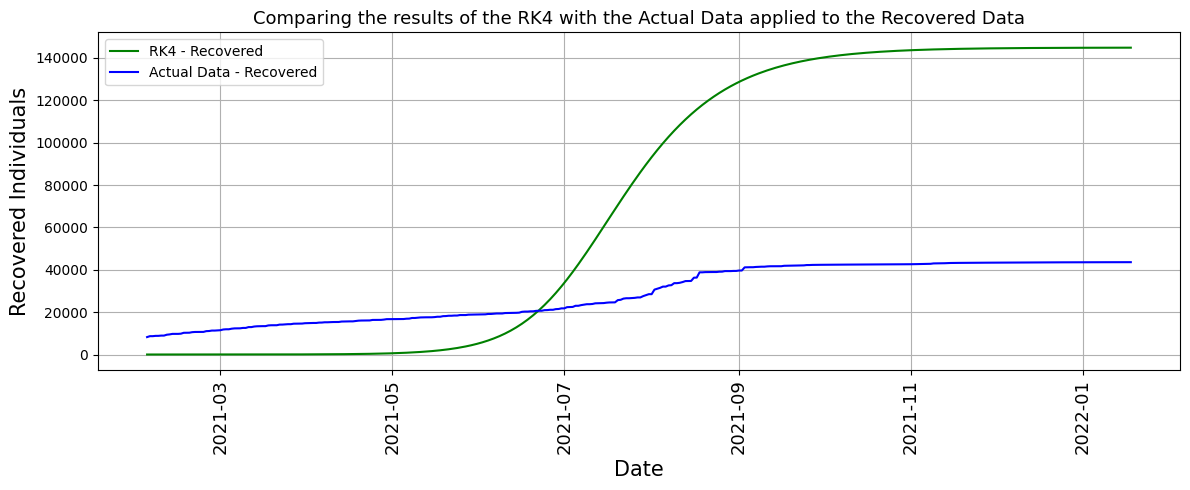

In [90]:
df_350 = df.head(350)

# Create a line plot
plt.figure(figsize=(12, 5))
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.15, 1/14, 120000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.129, 1/14, 120000), label="RK4 - Recovered", color="green")

# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.15, 1/14, 150000), label="RK4 - Recovered", color="green")

# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.13, 1/14, 180000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.135, 1/14, 180000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.14, 1/14, 180000), label="RK4 - Recovered", color="green")
plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.145, 1/14, 180000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.147, 1/14, 180000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.15, 1/14, 180000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.155, 1/14, 180000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.157, 1/14, 180000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.16, 1/14, 180000), label="RK4 - Recovered", color="green")

# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.15, 1/14, 200000), label="RK4 - Recovered", color="green")

# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.128, 1/14, 220000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.135, 1/14, 220000), label="RK4 - Recovered", color="green")
# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.15, 1/14, 220000), label="RK4 - Recovered", color="green")

# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.14, 1/14, 240000), label="RK4 - Recovered", color="green")

# plt.plot(df_350["Tanggal"], R_RK4(range(0,350), 0.15, 1/14, 250000), label="RK4 - Recovered", color="green")

plt.plot(df_350["Tanggal"], df_350["Removed"], label="Actual Data - Recovered", color="blue")

# Adding titles and labels
plt.title("Comparing the results of the RK4 with the Actual Data applied to the Recovered Data", fontsize="13")
plt.xlabel("Date", fontsize="15")
plt.ylabel("Recovered Individuals",fontsize="15")
plt.legend()

# Improve formatting
plt.xticks(rotation=90, fontsize="13")
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.savefig("R-145.png", dpi=600, bbox_inches="tight")
plt.show()

#### **Susceptible**

In [91]:
# Format : Change the data type for the susceptible columns to numeric
df["Susceptible"] = pd.to_numeric(df["Susceptible"], errors="coerce")

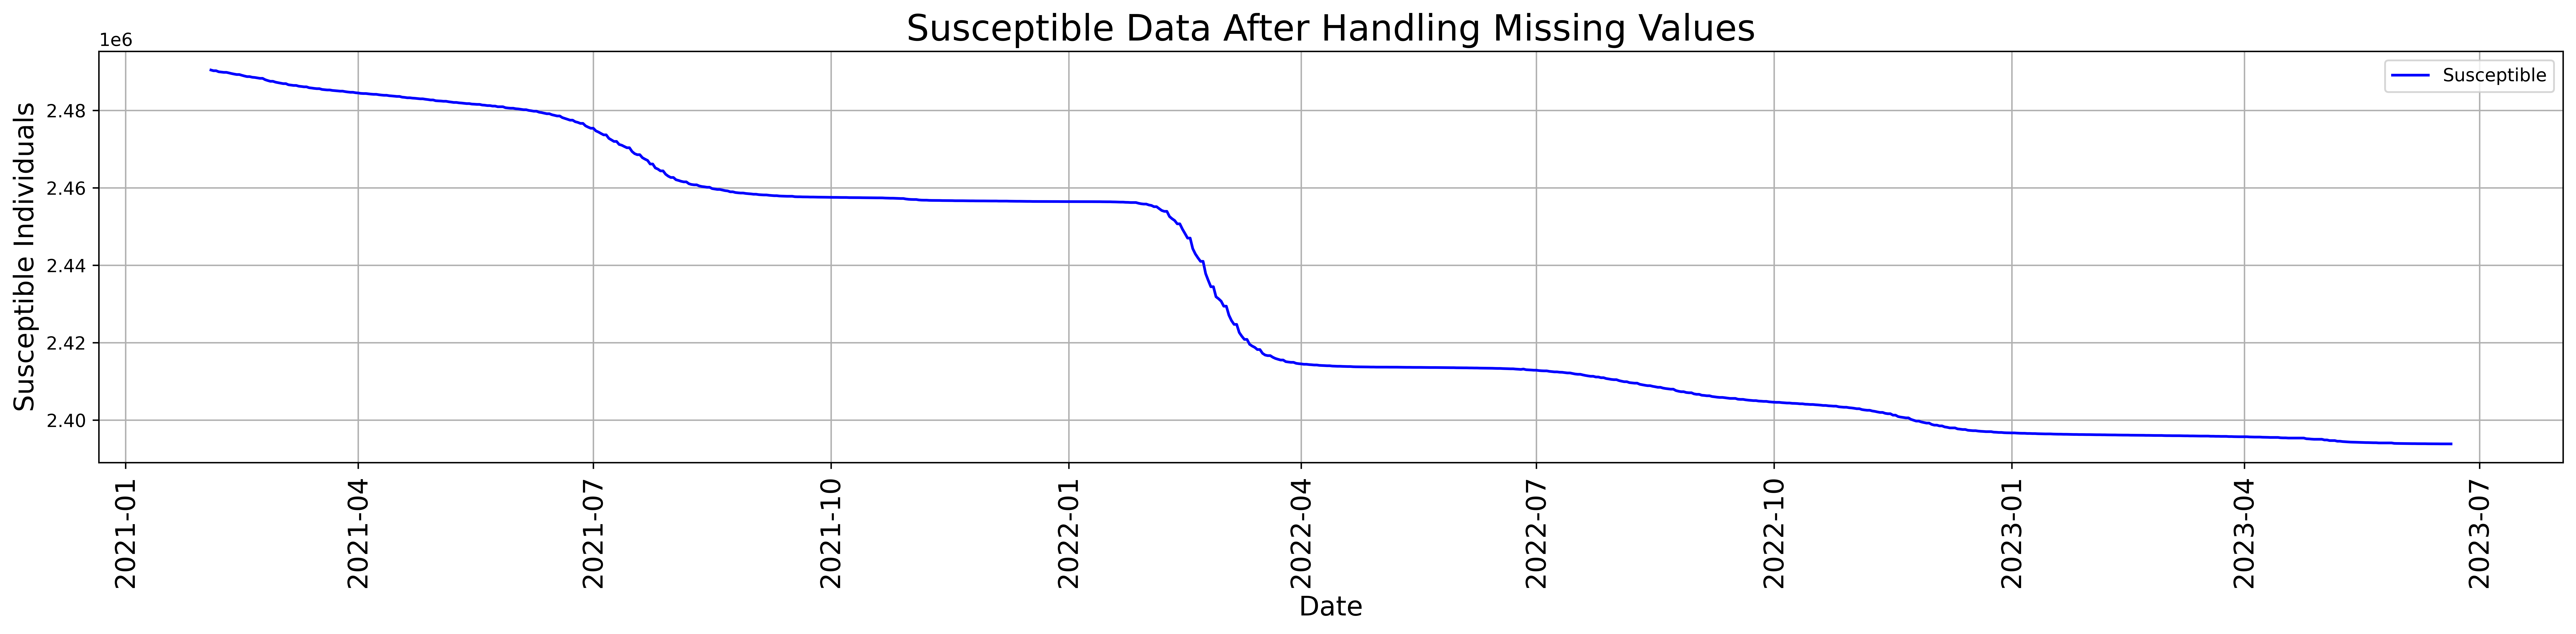

In [92]:
# Visualization
days = np.arange(0,len(df["Susceptible"])).tolist()
df["Day"] = days

# Create a line plot
plt.figure(figsize=(20, 5), dpi=600)
plt.plot(df["Tanggal"], df["Susceptible"], label="Susceptible", color="blue")

# Adding titles and labels
plt.title("Susceptible Data After Handling Missing Values", fontsize = "20")
plt.xlabel("Date", fontsize = "15")
plt.ylabel("Susceptible Individuals", fontsize = "15")
plt.legend()

# Improve formatting
# plt.xticks(rotation=90,fontsize="6")
plt.xticks(rotation=90, fontsize="15")
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
# plt.savefig("Susceptible - After Handling Missing Values.png", dpi=300, bbox_inches="tight")
plt.show()

In [93]:
"""df_350 = df.head(350)

# Create a line plot
plt.figure(figsize=(12, 5))
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.15, 1/14, 120000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.129, 1/14, 120000), label="RK4 - Susceptible", color="purple")

# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.15, 1/14, 150000), label="RK4 - Susceptible", color="purple")

# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.13, 1/14, 180000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.135, 1/14, 180000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.14, 1/14, 180000), label="RK4 - Susceptible", color="purple")
plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.145, 1/14, 180000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.147, 1/14, 180000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.15, 1/14, 180000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.155, 1/14, 180000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.157, 1/14, 180000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.16, 1/14, 180000), label="RK4 - Susceptible", color="purple")

# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.15, 1/14, 200000), label="RK4 - Susceptible", color="purple")

# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.128, 1/14, 220000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.135, 1/14, 220000), label="RK4 - Susceptible", color="purple")
# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.15, 1/14, 220000), label="RK4 - Susceptible", color="purple")

# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.14, 1/14, 240000), label="RK4 - Susceptible", color="purple")

# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.15, 1/14, 250000), label="RK4 - Susceptible", color="purple")

plt.plot(df_350["Tanggal"], df_350["Susceptible"], label="Actual Data - Susceptible", color="blue")

# Adding titles and labels
plt.title("Comparing the results of the RK4 with the Actual Data applied to the Susceptible Data", fontsize="13")
plt.xlabel("Date", fontsize="15")
plt.ylabel("Susceptible Individuals",fontsize="15")
plt.legend()

# Improve formatting
plt.xticks(rotation=90, fontsize="13")
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.savefig("S-145.png", dpi=600, bbox_inches="tight")
plt.show()"""

'df_350 = df.head(350)\n\n# Create a line plot\nplt.figure(figsize=(12, 5))\n# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.15, 1/14, 120000), label="RK4 - Susceptible", color="purple")\n# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.129, 1/14, 120000), label="RK4 - Susceptible", color="purple")\n\n# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.15, 1/14, 150000), label="RK4 - Susceptible", color="purple")\n\n# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.13, 1/14, 180000), label="RK4 - Susceptible", color="purple")\n# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.135, 1/14, 180000), label="RK4 - Susceptible", color="purple")\n# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.14, 1/14, 180000), label="RK4 - Susceptible", color="purple")\nplt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.145, 1/14, 180000), label="RK4 - Susceptible", color="purple")\n# plt.plot(df_350["Tanggal"], S_RK4(range(0,350), 0.147, 1/14, 180000), label="RK4 - Susceptible", color="purple"

# **Evaluation**

In [94]:
# Normalize the Infected and Recovered data using MinMaxScaler
scaler = MinMaxScaler()

df["Infected-Normalized"] = scaler.fit_transform(df[["Terinfeksi"]])
df["Recovered-Normalized"] = scaler.fit_transform(df[["Removed"]])
# df["Susceptible-Normalized"] = scaler.fit_transform(df[["Susceptible"]])

# Define the time range for the first 350 days
t_range = range(0, 350)

# Calculate predicted infected and recovered using RK4
predicted_infected_normalized = scaler.transform(np.array(I_RK4(t_range, 0.145, 1/14, 180000)).reshape(-1, 1)).flatten()
predicted_recovered_normalized = scaler.transform(np.array(R_RK4(t_range, 0.145, 1/14, 180000)).reshape(-1, 1)).flatten()
# predicted_susceptible_normalized = scaler.transform(np.array(S_RK4(t_range, 0.145, 1/14, 180000)).reshape(-1, 1)).flatten()

# Extract the actual normalized data
actual_infected_normalized = df["Infected-Normalized"][:350]
actual_recovered_normalized = df["Recovered-Normalized"][:350]
#actual_susceptible_normalized = df["Susceptible-Normalized"][:350]

# CALCULATE
# Calculate RMSE for Infected
rmse_infected = np.sqrt(mean_squared_error(actual_infected_normalized, predicted_infected_normalized))

# Calculate RMSE for Recovered
rmse_recovered = np.sqrt(mean_squared_error(actual_recovered_normalized, predicted_recovered_normalized))

# Calculate RMSE for Susceptible
#rmse_susceptible = np.sqrt(mean_squared_error(actual_susceptible_normalized, predicted_recovered_normalized))

print(f"RMSE for Infected Data After Normalization: {rmse_infected}")
print(f"RMSE for Recovered Data After Normalization: {rmse_recovered}")
# print(f"RMSE for Susceptible Data After Normalization: {rmse_susceptible}")


RMSE for Infected Data After Normalization: 0.15772018344801345
RMSE for Recovered Data After Normalization: 0.7000541089401209


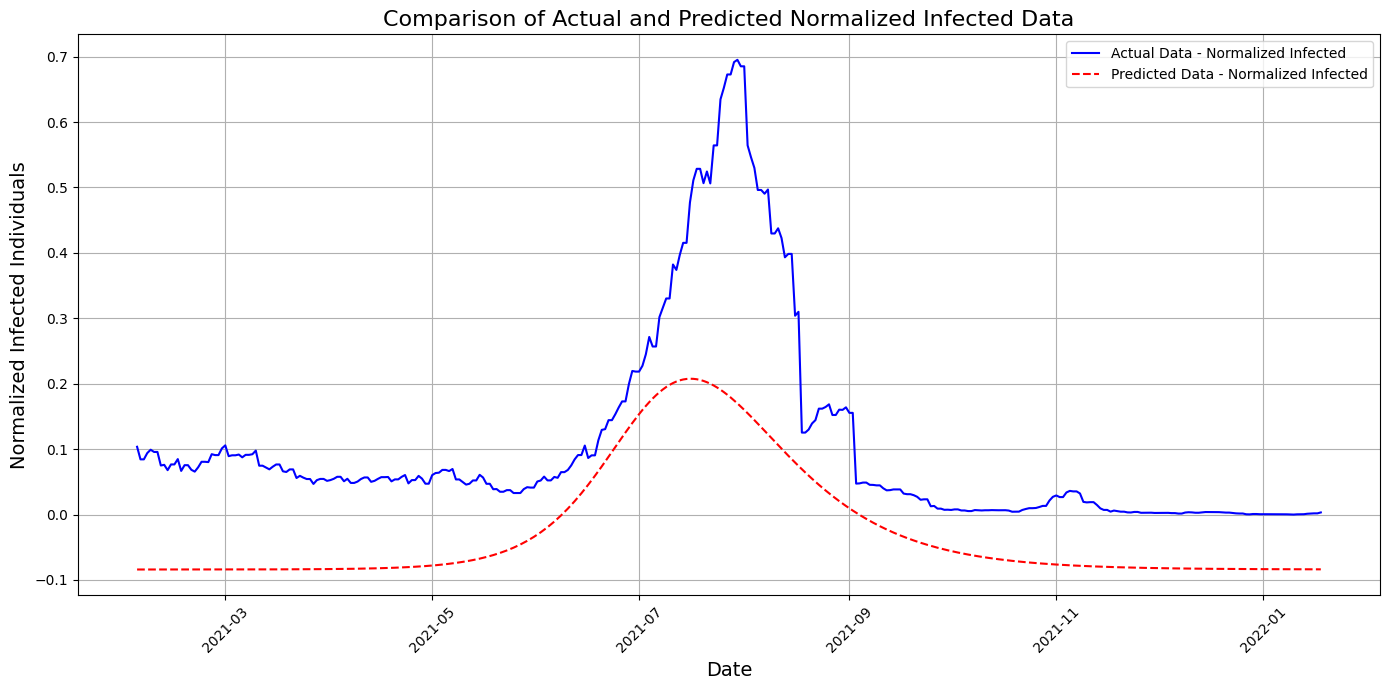

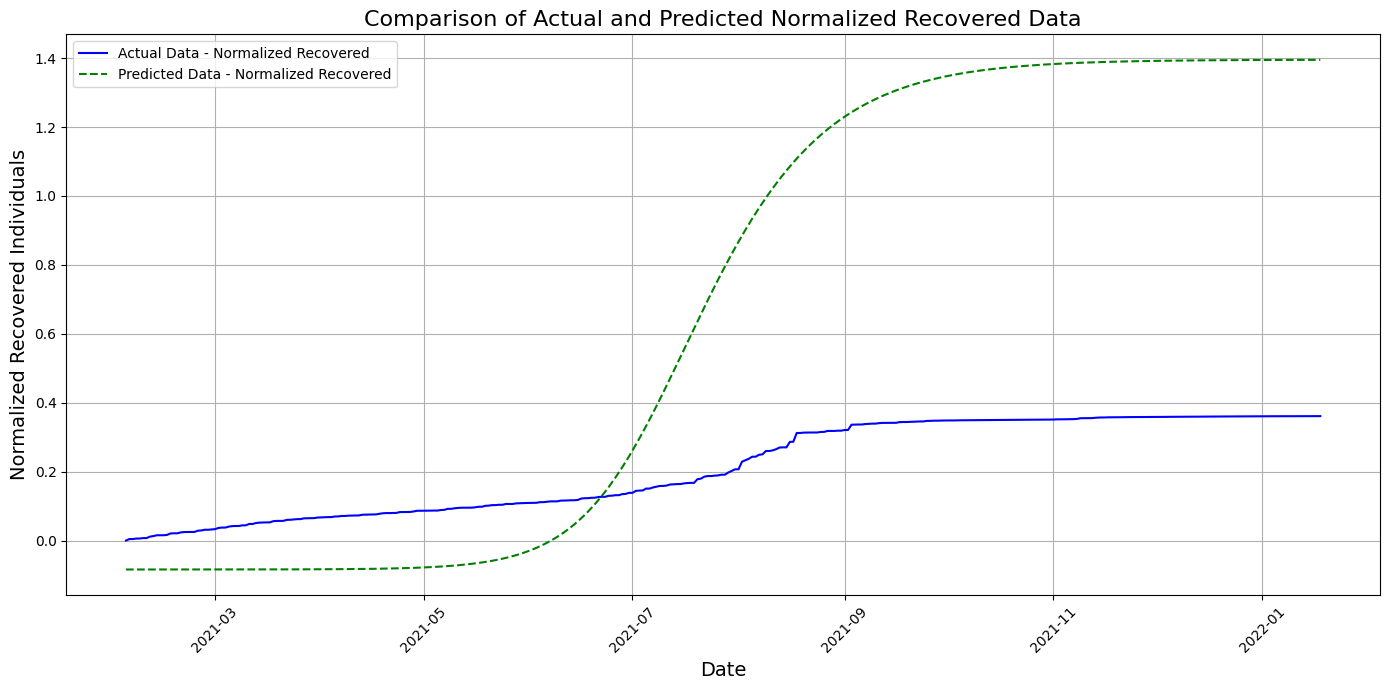

'# SUSCEPTIBLE\n# Plot of actual and normalized predicted data for recovery\nplt.figure(figsize=(14, 7))\nplt.plot(df["Tanggal"][:350], actual_susceptible_normalized, label="Actual Data - Normalized Susceptible", color="blue")\nplt.plot(df["Tanggal"][:350], predicted_susceptible_normalized, label="Predicted Data - Normalized Susceptible", color="purple", linestyle="--")\n\n# Adding titles and labels\nplt.title("Comparison of Actual and Predicted Normalized SusceptibleData", fontsize=16)\nplt.xlabel("Date", fontsize=14)\nplt.ylabel("Normalized Susceptible Individuals", fontsize=14)\nplt.legend()\nplt.xticks(rotation=45)\nplt.grid(visible=True)\n\n# Showing plot\nplt.tight_layout()\n# plt.savefig("S-145-NORM.png", dpi=600, bbox_inches="tight")\nplt.show()'

In [95]:
# Visualization

# INFECTED
# Plot of actual and normalized predicted data for infections
plt.figure(figsize=(14, 7))
plt.plot(df["Tanggal"][:350], actual_infected_normalized, label="Actual Data - Normalized Infected", color="blue")
plt.plot(df["Tanggal"][:350], predicted_infected_normalized, label="Predicted Data - Normalized Infected", color="red", linestyle="--")

# Adding titles and labels
plt.title("Comparison of Actual and Predicted Normalized Infected Data", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized Infected Individuals", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(visible=True)

# Showing plot
plt.tight_layout()
# plt.savefig("I-145-NORM.png", dpi=600, bbox_inches="tight")
plt.show()

# RECOVERED
# Plot of actual and normalized predicted data for recovery
plt.figure(figsize=(14, 7))
plt.plot(df["Tanggal"][:350], actual_recovered_normalized, label="Actual Data - Normalized Recovered", color="blue")
plt.plot(df["Tanggal"][:350], predicted_recovered_normalized, label="Predicted Data - Normalized Recovered", color="green", linestyle="--")

# Adding titles and labels
plt.title("Comparison of Actual and Predicted Normalized Recovered Data", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized Recovered Individuals", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(visible=True)

# Showing plot
plt.tight_layout()
# plt.savefig("R-145-NORM.png", dpi=600, bbox_inches="tight")
plt.show()

"""# SUSCEPTIBLE
# Plot of actual and normalized predicted data for recovery
plt.figure(figsize=(14, 7))
plt.plot(df["Tanggal"][:350], actual_susceptible_normalized, label="Actual Data - Normalized Susceptible", color="blue")
plt.plot(df["Tanggal"][:350], predicted_susceptible_normalized, label="Predicted Data - Normalized Susceptible", color="purple", linestyle="--")

# Adding titles and labels
plt.title("Comparison of Actual and Predicted Normalized SusceptibleData", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized Susceptible Individuals", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(visible=True)

# Showing plot
plt.tight_layout()
# plt.savefig("S-145-NORM.png", dpi=600, bbox_inches="tight")
plt.show()"""